This note book ran 3 regressions based on the type of shopping centers and detected the outliers

In [ ]:
import geopandas as gpd
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

## High end

In [16]:
highend = pd.read_excel("C:\\Users\\Chi\\Desktop\\shanghai\\locationfeatures\\high_end.xls")

In [20]:
from sklearn.linear_model import LinearRegression
y=highend['LocationValue']
x=highend['Operation'].to_numpy().reshape((-1,1))
reg1 = LinearRegression().fit(x, y)
prediction = reg1.predict(x)
residual = (y - prediction)
mean=residual.mean().astype('long')
std=residual.std()
print(mean,std*2.5)

0 0.14524264098334677


In [21]:
highend['residual']=residual
highend["outlier"] = np.where((highend["residual"] >= 2.5*std)|(highend["residual"] <= -2.5*std), 'Y', "N")
highend

,name,LocationValue,Operation,residual,outlier
0,上海中信泰富广场,0.197159,2.394991e+05,0.003468,N
1,上海百盛(淮海店),0.207818,1.725006e+06,-0.019060,N
2,上海前滩太古里,0.172953,1.918775e+05,-0.019674,N
3,上海永安百货,0.250544,4.309453e+05,0.052576,N
4,上海itc one,0.262203,1.994005e+06,0.029316,N
5,上海置地广场商厦,0.260792,1.075271e+06,0.048429,N
6,上海静安嘉里中心,0.238900,4.710730e+05,0.040035,N
7,上海东方商厦(旗舰店),0.204722,1.073802e+06,-0.007607,N
8,上海香港广场,0.310299,2.772955e+05,0.115764,N
9,上海万象城,0.164109,2.175731e+05,-0.029092,N


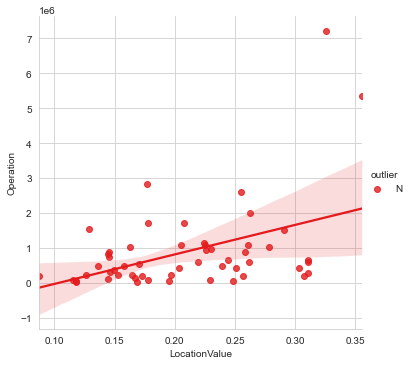

In [7]:
sns.set_style("whitegrid")
sns.color_palette("rocket")
sns.lmplot(data=highend, x="LocationValue", y="Operation",palette="Set1")

## Mid end

In [8]:
midend = pd.read_excel("C:\\Users\\Chi\\Desktop\\shanghai\\locationfeatures\\mid_end.xls")

In [9]:
y=midend['LocationValue']
x=midend['Operation'].to_numpy().reshape((-1,1))
reg2 = LinearRegression().fit(x, y)
prediction = reg2.predict(x)
residual = (y - prediction)
mean=residual.mean().astype('long')
std=residual.std()
print(mean,std*2.5)

0 0.1416861992492268


In [10]:
midend['residual']=residual
midend["outlier"] = np.where((midend["residual"] >= 2.5*std)|(midend["residual"] <= -2.5*std), 'Y', "N")
midend

,name,LocationValue,Operation,residual,outlier
0,上海百联南方购物中心二区,0.131849,238815.468750,-0.074943,N
1,上海松江印象城,0.173861,23290.193548,-0.020530,N
2,上海爱琴海购物公园,0.198081,182339.500000,-0.005461,N
3,上海仲盛世界商城,0.218660,36657.705479,0.023500,N
4,上海百联世纪购物中心,0.160016,157520.000000,-0.042098,N
...,...,...,...,...,...
124,上海芮欧百货,0.233203,582940.277778,0.006611,N
125,上海百联南方购物中心一区,0.138780,148757.500000,-0.062830,N
126,上海大宁国际商业广场,0.237912,180024.952381,0.034503,N
127,上海松江万达广场,0.233168,29780.331374,0.038404,N


In [12]:
midend[midend['outlier'].str.contains("Y")]

,name,LocationValue,Operation,residual,outlier
65,上海浦东大拇指广场,0.356088,42836.363636,0.160573,Y
76,上海金山万达广场,0.381658,13636.623068,0.187822,Y
94,上海临港宝龙广场,0.358998,13680.000000,0.165160,Y


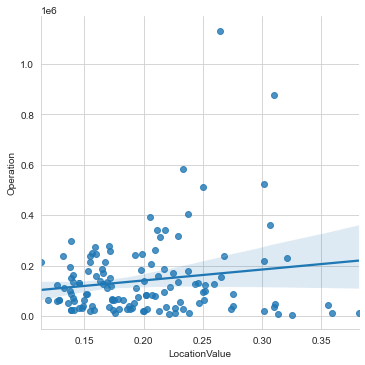

In [32]:
sns.set_style("whitegrid")
sns.color_palette("rocket")
ax=sns.lmplot(data=midend, y="Operation", x="LocationValue",palette="Set1")

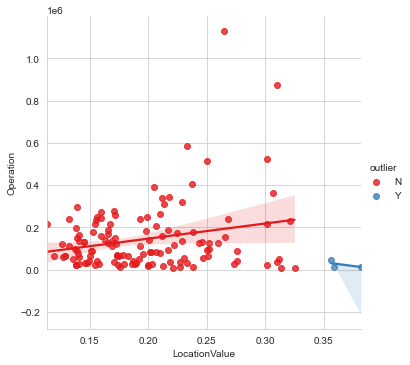

In [15]:
sns.set_style("whitegrid")
sns.color_palette("rocket")
ax=sns.lmplot(data=midend, y="Operation", x="LocationValue",hue="outlier",palette="Set1")
#ax.set(ylim=(0,0.45))
#sns.scatterplot(data=midend, x="LocationValue", y="Operation", hue="outlier",palette="Set1")

## low end

In [22]:
lowend = pd.read_excel("C:\\Users\\Chi\\Desktop\\shanghai\\locationfeatures\\low_end.xls")

In [23]:
y=lowend['LocationValue']
x=lowend['Operation'].to_numpy().reshape((-1,1))
reg3 = LinearRegression().fit(x, y)
prediction = reg3.predict(x)
residual = (y - prediction)
mean=residual.mean().astype('long')
std=residual.std()
print(mean,std*2.5)

0 0.17253400035167832


In [27]:
lowend['residual']=residual
lowend["outlier"] = np.where((lowend["residual"] >= 2.5*std)|(lowend["residual"] <= -2.5*std), 'Y', "N")
lowend.head(n=50)

,name,LocationValue,Operation,residual,outlier
0,上海陆悦坊,0.163855,34037.000000,-0.040637,N
1,上海普陀绿地缤纷城,0.243025,8815.087719,0.038420,N
2,上海万科2049城花,0.130949,36388.571429,-0.073533,N
3,上海崧泽华城生活汇,0.185880,356.000000,-0.018763,N
4,上海久金广场,0.199528,43361.600000,-0.004922,N
5,上海君欣时代广场,0.239566,80372.250000,0.035282,N
6,上海港城新天地,0.294624,18132.400000,0.090061,N
7,上海ist艾尚天地,0.278575,17119.615385,0.074007,N
8,上海绿茵商业广场,0.143174,87.209302,-0.061470,N
9,上海华漕生活馆,0.147748,3382.857143,-0.056882,N


In [29]:
lowend[lowend['outlier'].str.contains("Y")]

,name,LocationValue,Operation,residual,outlier
10,上海佳源梦想广场,0.377320,32531.400000,0.172821,Y
73,上海龙湖华泾天街,0.403403,26281.692308,0.198876,Y
138,上海崇明万达广场,0.500430,4987.338362,0.295807,Y
141,上海大华老镇嘉年华,0.488263,550.000000,0.283620,Y


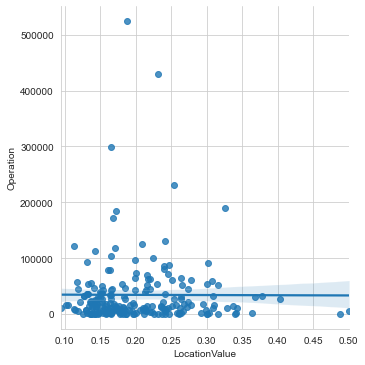

In [51]:
sns.lmplot(data=lowend, y="Operation", x="LocationValue",)

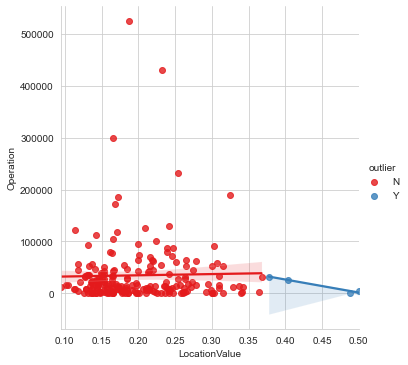

In [30]:
sns.set_style("whitegrid")
sns.color_palette("rocket")
sns.lmplot(data=lowend, x="LocationValue", y="Operation",hue="outlier",palette="Set1")
#sns.lmplot(data=lowend,x="Operation", y="LocationValue")